# Data Reading

In [45]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('data-project-ml.csv')
data.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [47]:
#change everything to integer
data = data.astype(int)

# Univariate Analysis

In [48]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Identify binary features
# binary_features = [column for column in data.columns if data[column].nunique() == 2 and sorted(data[column].unique()) == [0, 1]]

# # Determine the number of rows needed for subplots (with 3 columns)
# n_features = len(data.columns)
# n_rows = n_features // 3 + (1 if n_features % 3 else 0)

# # Create a figure with subplots in 3 columns
# fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
# axs = axs.flatten()  # Flatten the array for easy iteration

# # Plotting
# for i, feature in enumerate(data.columns):
#     if feature in binary_features:
#         # For binary features, plot a pie chart
#         data[feature].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[i], startangle=90)
#         axs[i].set_ylabel('')  # Remove the y-label as it's unnecessary for pie charts
#     elif data[feature].dtype == 'object':
#         # For non-binary categorical data
#         sns.countplot(x=feature, data=data, ax=axs[i])
#     else:
#         # For numerical data
#         sns.histplot(data[feature], bins=10, kde=False, ax=axs[i])
#     axs[i].set_title(feature)

# # Hide any unused axes if the number of features is not a multiple of 3
# for i in range(n_features, n_rows * 3):
#     if i < len(axs):  # Check if index is within the range of axes
#         fig.delaxes(axs[i])

# plt.tight_layout()
# plt.show()


xxx

# Binning

In [49]:
# print unique values for each column
for column in data.columns:
    print(f'{column}: {data[column].unique()}')

HeartDiseaseorAttack: [0 1]
HighBP: [1 0]
HighChol: [1 0]
CholCheck: [1 0]
BMI: [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker: [1 0]
Stroke: [0 1]
Diabetes: [0 2 1]
PhysActivity: [0 1]
Fruits: [0 1]
Veggies: [1 0]
HvyAlcoholConsump: [0 1]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
GenHlth: [5 3 2 4 1]
MentHlth: [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth: [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk: [1 0]
Sex: [0 1]
Age: [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education: [4 6 3 5 2 1]
Income: [3 1 8 6 4 7 2 5]


## BMI

In [50]:
data['BMI'] = pd.cut(data['BMI'], 
                     bins=[0, 18.5, 25, 30, 35, 40, 100], 
                     labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese', 'Morbidly Obese'])


## MenHlth & PhysHlth

In [51]:
# Bin 'MentHlth' into 4 groups
data['MentHlth'] = pd.cut(data['MentHlth'], 
                           bins=[-1, 3, 5, 10, 20, 100], 
                           labels=['a', 'b', 'c', 'd', 'e'])

# Bin 'PhysHlth' into 4 groups
data['PhysHlth'] = pd.cut(data['PhysHlth'], 
                           bins=[-1, 3, 5, 10, 20, 100], 
                           labels=['a', 'b', 'c', 'd', 'e'])

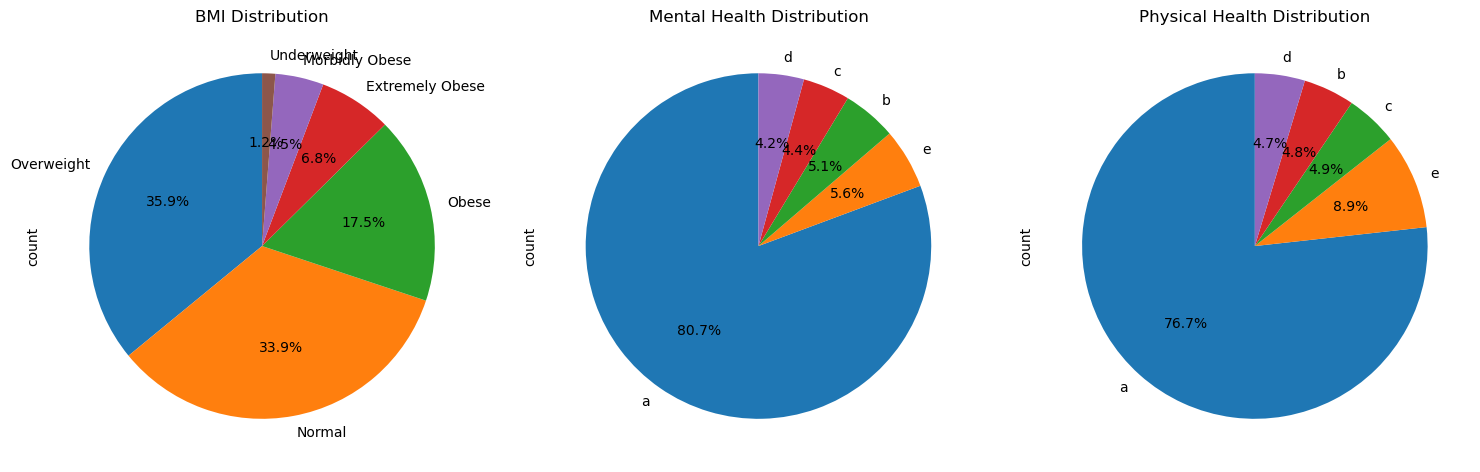

In [52]:
# Create a figure and three subplots arranged in 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot pie chart for 'BMI'
data['BMI'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axs[0])
axs[0].set_title('BMI Distribution')

# Plot pie chart for 'MentHlth'
data['MentHlth'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axs[1])
axs[1].set_title('Mental Health Distribution')

# Plot pie chart for 'PhysHlth'
data['PhysHlth'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axs[2])
axs[2].set_title('Physical Health Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  253680 non-null  int32   
 1   HighBP                253680 non-null  int32   
 2   HighChol              253680 non-null  int32   
 3   CholCheck             253680 non-null  int32   
 4   BMI                   253680 non-null  category
 5   Smoker                253680 non-null  int32   
 6   Stroke                253680 non-null  int32   
 7   Diabetes              253680 non-null  int32   
 8   PhysActivity          253680 non-null  int32   
 9   Fruits                253680 non-null  int32   
 10  Veggies               253680 non-null  int32   
 11  HvyAlcoholConsump     253680 non-null  int32   
 12  AnyHealthcare         253680 non-null  int32   
 13  NoDocbcCost           253680 non-null  int32   
 14  GenHlth               253680 non-nul

# Bivariate Analysis

# Saving the Data

In [54]:
# save the data to a new csv file
data.to_csv('data-project-ml-binned.csv', index=False)